# Activation Function Roadmap / Guide

## 1. Default Choice for Hidden Layers
- **Default:** **ReLU**
  - Very fast, cheap, simple  
  - Works well in most deep networks  
  - Avoids vanishing gradient for positive inputs  

---

## 2. Variants of ReLU

| Variant | When to use |
|---------|------------|
| **Leaky ReLU** | If some neurons “die” (output stuck at 0) in ReLU → allows small gradient for x < 0 |
| **Parametric ReLU (PReLU)** | Similar to Leaky ReLU but α is **learnable** → use if you want the network to adapt slope for negative inputs |
| **Randomized ReLU (RReLU)** | Use in **regularization** scenarios → slopes for negative inputs are randomized during training |
| **ELU / SELU** | Use when you want **negative outputs** to push mean activations closer to zero → can improve convergence in deeper networks |

---

## 3. Smooth, Non-linear Activations

| Activation | When to use |
|------------|------------|
| **Sigmoid** | Binary classification (output layer) or older architectures; avoid using in deep hidden layers due to vanishing gradients |
| **Tanh** | Hidden layers where **zero-centered outputs** are useful; still can suffer vanishing gradient for deep networks |
| **Softplus** | Smooth alternative to ReLU; use if ReLU’s sharp kink causes instability or smooth gradients are desired |

---

## 4. Output Layer Choices

| Task | Recommended Activation |
|------|----------------------|
| Binary classification | **Sigmoid** → outputs probability (0–1) |
| Multi-class classification | **Softmax** → outputs probabilities over classes |
| Regression | **Linear / None** → raw real-valued outputs |
| Regression (non-negative) | **ReLU / Softplus** → ensures positive predictions |

---

## 5. Quick Decision Tree (Hidden Layer Focus)

Start → Hidden Layer
├─ Default → ReLU
├─ Dying neurons? → Leaky ReLU or PReLU
├─ Want smooth activation? → Softplus
├─ Want zero-centered outputs? → Tanh
└─ Old network / very shallow? → Sigmoid


---

## 6. Summary Table

| Activation | Hidden Layer | Output Layer | Pros | Cons |
|------------|-------------|-------------|------|------|
| ReLU | ✅ Default | ❌ | Fast, simple, avoids vanishing gradient | Dead neurons if x<0 |
| Leaky ReLU | ✅ Alternative | ❌ | Solves dead neurons | Slightly more computation |
| PReLU | ✅ Alternative | ❌ | Learnable negative slope | More parameters |
| Sigmoid | ⚠️ Rare | ✅ Binary output | Probabilistic output | Vanishing gradient, not zero-centered |
| Tanh | ✅ Hidden | ⚠️ Rare | Zero-centered, smooth | Vanishing gradient, slower than ReLU |
| Softplus | ✅ Hidden | ❌ | Smooth ReLU, differentiable everywhere | Exp/log computation |
| Softmax | ❌ Hidden | ✅ Multi-class output | Probabilities over classes | Expensive, not for hidden layers |

---

## 7. Rules of Thumb

1. **Hidden layers:**  
   - ReLU → default  
   - Leaky/PReLU → if dead neurons are a problem  
   - Tanh/Softplus → when zero-centered or smooth outputs are desired  

2. **Output layers:**  
   - Sigmoid → binary classification  
   - Softmax → multi-class classification  
   - Linear/ReLU → regression  

3. **Performance considerations:**  
   - ReLU → fastest  
   - Sigmoid/Tanh → slower, vanishing gradient  
   - Softplus → smooth but more expensive  
   - Softmax → only for output, expensive


# Activation Function Comparison Table

| Activation | Formula | Derivative | Smooth | Differentiable | Typical Use Case | Advantages | Disadvantages | Computation Cost |
|------------|--------|------------|--------|----------------|----------------|------------|---------------|----------------|
| **ReLU** | $f(x) = \max(0, x)$ | $f'(x) = \begin{cases} 1 & x>0 \\ 0 & x \le 0 \end{cases}$ | ❌ | ❌ at $x=0$ | Hidden layers (default) | Fast, avoids vanishing gradient | Dead neurons for $x<0$ | Very cheap |
| **Leaky ReLU** | $f(x) = \begin{cases} x & x>0 \\ \alpha x & x \le 0 \end{cases}$ | $f'(x) = \begin{cases} 1 & x>0 \\ \alpha & x \le 0 \end{cases}$ | ❌ | ✅ | Hidden layers | Solves dead neuron problem | Slightly more computation | Cheap |
| **Parametric ReLU (PReLU)** | $f(x) = \begin{cases} x & x>0 \\ \alpha x & x \le 0 \end{cases}, \alpha \text{ learnable}$ | $f'(x) = \begin{cases} 1 & x>0 \\ \alpha & x \le 0 \end{cases}$ | ❌ | ✅ | Hidden layers | Learnable negative slope | Extra parameters | Cheap |
| **Sigmoid** | $f(x) = \frac{1}{1 + e^{-x}}$ | $f'(x) = f(x)(1-f(x))$ | ✅ | ✅ | Binary output, shallow layers | Probabilistic output | Vanishing gradient, not zero-centered | Moderate |
| **Tanh** | $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | $f'(x) = 1 - f(x)^2$ | ✅ | ✅ | Hidden layers | Zero-centered, smooth | Vanishing gradient, slower than ReLU | Moderate-High |
| **Softplus** | $f(x) = \ln(1 + e^x)$ | $f'(x) = \frac{1}{1 + e^{-x}} = \text{sigmoid}(x)$ | ✅ | ✅ | Hidden layers, smooth alternative to ReLU | Smooth, differentiable everywhere | Exp/log computation | Moderate |
| **Softmax** | $f(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$ | $f'_i = f_i (\delta_{ij} - f_j)$ | ✅ | ✅ | Output layer for multi-class | Probabilities over classes | Expensive, not for hidden layers | High |


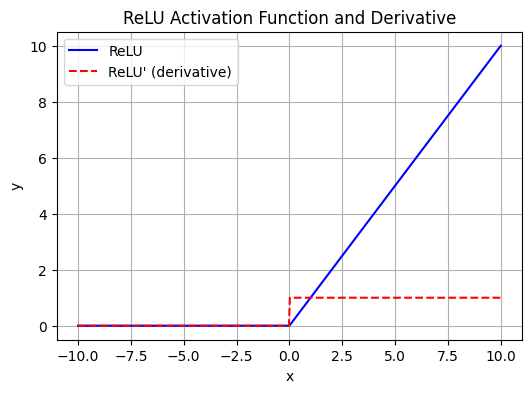

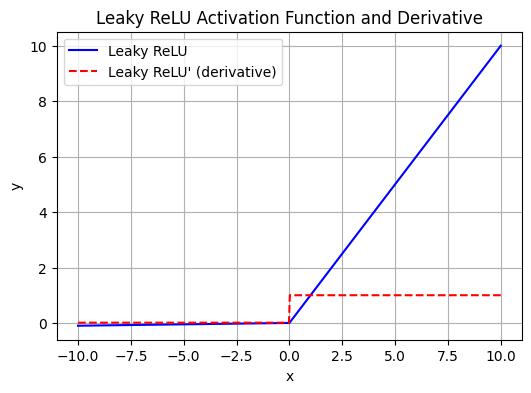

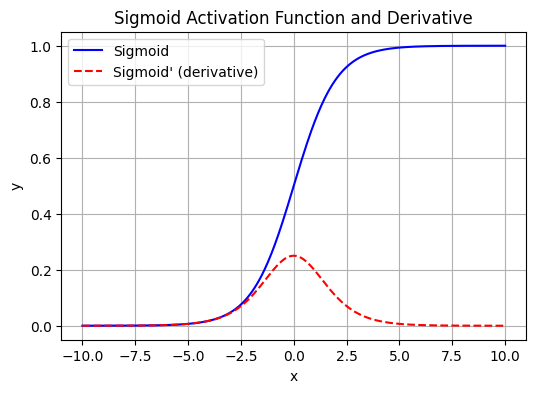

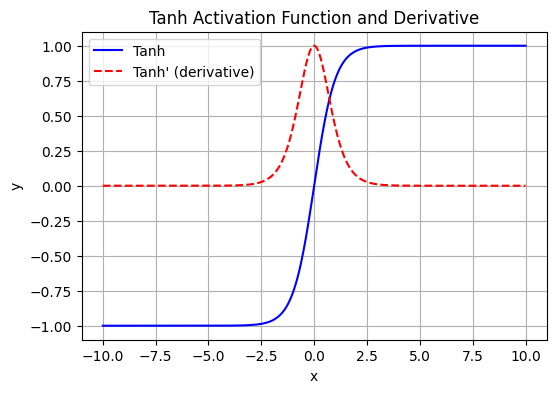

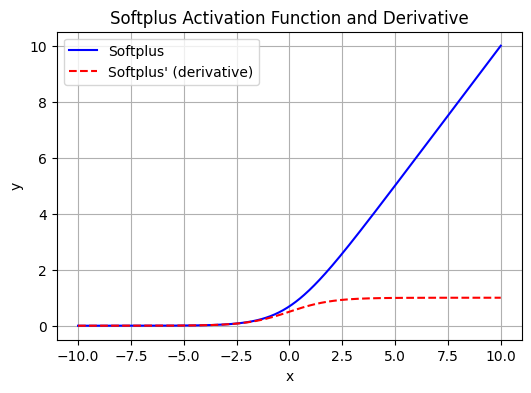

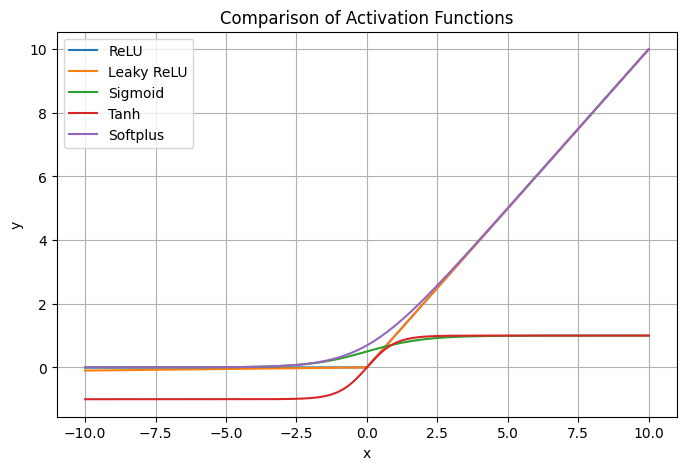

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Define activation functions
# ---------------------------
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha*x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def softplus(x):
    return np.log1p(np.exp(x))  # log(1+exp(x)) numerically stable

def softplus_derivative(x):
    return sigmoid(x)  # derivative of softplus = sigmoid

# Softmax is typically for vectors, we can illustrate 1D softmax for simplicity
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# ---------------------------
# Plot each function + derivative
# ---------------------------
x = np.linspace(-10, 10, 500)

functions = [
    ('ReLU', relu, relu_derivative),
    ('Leaky ReLU', leaky_relu, leaky_relu_derivative),
    ('Sigmoid', sigmoid, sigmoid_derivative),
    ('Tanh', tanh, tanh_derivative),
    ('Softplus', softplus, softplus_derivative)
]

for name, func, deriv in functions:
    y = func(x)
    y_prime = deriv(x)
    
    plt.figure(figsize=(6,4))
    plt.plot(x, y, label=f'{name}', color='blue')
    plt.plot(x, y_prime, label=f"{name}' (derivative)", color='red', linestyle='--')
    plt.title(f'{name} Activation Function and Derivative')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# ---------------------------
# Plot all activation functions together (without derivatives)
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, softplus(x), label='Softplus')
plt.title('Comparison of Activation Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
